# Understanding the Derivative

You just saw these three statements. 

> 1. **Velocity** is the instantaneous rate of change of **position**
> 2. **Velocity** is the slope of the tangent line of **position**
> 3. **Velocity** is the derivative of **position**

But there's another, more formal (and mathematical) definition of the derivative that you're going to explore in this notebook as you build an intuitive understanding for what a derivative is.

## BEFORE YOU CONTINUE
This notebook is a long one and it really requires focus and attention to be useful. Before you continue, make sure that:

1. You have **at least 30 minutes** of time to spend here.
2. You have the mental energy to read through math and some (occasionally) complex code.


-----

## Formal definition of the derivative

The **derivative of $f(t)$ with respect to t** is the function $\dot{f}(t)$ ("f dot of t") and is defined as

$$\dot{f}(t) = \lim_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

You should read this equation as follows:

*"F dot of t is equal to the limit as delta t goes to zero of F of t plus delta t minus F of t all over delta t"*

## Outline
In this notebook we are going to unpack this definition by walking through a series of activities that will end with us defining a python function called `approximate_derivative`. This function will look very similar to the math shown above.

A rough outline of how we'll get there:

1. **Discrete vs Continuous Motion** - A quick reminder of the difference between **discrete** and **continuous** motion and some practice defining continuous functions in code. 

2. **Plotting continuous functions** - This is where you'll see  `plot_continuous_function` which is a function that takes **another function** as an input.  

3. **Finding derivatives "by hand"** - Here you'll find the **velocity** of an object *at a particular time* by zooming in on its **position vs time** graph and finding the slope.

4. **Finding derivatives algorithmically** - Here you'll use a function to reproduce the steps you just did "by hand".

5. **OPTIONAL: Finding the full derivative** - In steps 3 and 4 you actually found the derivative of a function *at a particular time*, here you'll see how you can get the derivative of a function for **all** times at once. Be warned - the code gets a little weird here.


-----

## 1 - Discrete vs Continuous Motion

The data we deal with in a self driving car comes to us discretely. That is, it only comes to us at certain timestamps. For example, we might get a position measurement at timestamp `t=352.396` and the next position measurement at timestamp `t=352.411`. But what happened in between those two measurements? Did the vehicle **not have a position** at, for example, `t=352.400`?

Of course not!

> Even though the position data we measure comes to us **discretely**, we know that the actual motion of the vehicle is **continuous**.

Let's say I start moving forwards from `x=0` at `t=0` with a speed of $2 m/s$. At t=1, x will be 2 and at t=4, x will be 8. I can plot my position at 1 second intervals as follows:

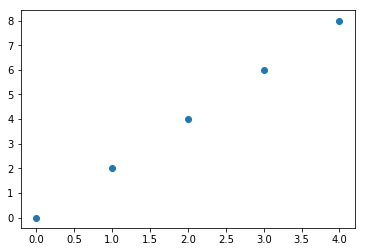

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

t = [0,1,2,3,4]
x = [0,2,4,6,8]

plt.scatter(t,x)
plt.show()

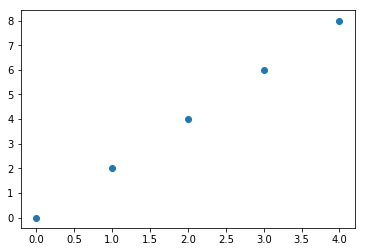

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
t = [0, 1, 2, 3, 4]
x = [0, 2, 4, 6, 8]
plt.scatter(t, x)
plt.show()

This graph above is a **discrete** picture of motion. And this graph came from two Python **lists**... 

But what about the underlying **continuous** motion? We can represent this motion with a function $f$ like this:

$$f(t)=2t$$


How can we represent that in code? 

A list won't do! We need to define (surprise, surprise) a function!

In [3]:
def position(time):
    return 2*time

print("at t =", 0, "position is", position(0))
print("at t =", 1, "position is", position(1))
print("at t =", 2, "position is", position(2))
print("at t =", 3, "position is", position(3))
print("at t =", 4, "position is", position(4))

at t = 0 position is 0
at t = 1 position is 2
at t = 2 position is 4
at t = 3 position is 6
at t = 4 position is 8


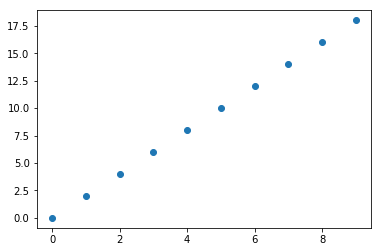

In [7]:
def position(time):
    return 2*time

t = [i for i in range(10)]
x = [position(i) for i in t]

plt.scatter(t,x)
plt.show()

That looks right (and it matches our data from above). Plus it can be used to get the position of the vehicle in between "sensor measurements!"

In [8]:
print("at t =", 2.2351, "position is", position(2.2351))

at t = 2.2351 position is 4.4702


This `position(time)` function is a continuous function of time. When you see $f(t)$ in the formal definition of the derivative you should think of something like this.

-----

## 2 - Plotting Continuous Functions

Now that we have a continuous function, how do we plot it??

We're going to use `numpy` and a function called `linspace` to help us out. First let me demonstrate plotting our position function for times between 0 and 4.

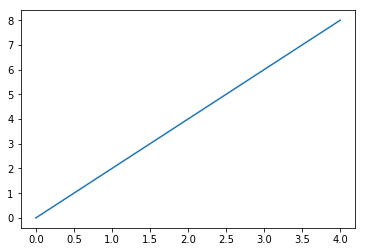

In [9]:
# Demonstration of continuous plotting

import numpy as np

t = np.linspace(0, 4)
x = position(t)

plt.plot(t, x)
plt.show()

#### EXERCISE - create and plot a continuous function of time
**Write a function, `position_b(time)` that represents the following motion:**

$$f(t)=-4.9t^2 + 30t$$

**then plot the function from t = 0 to t = 6.12**

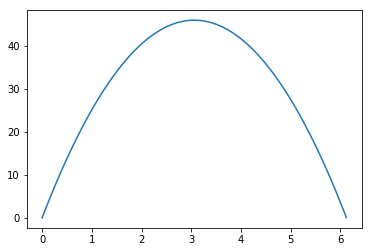

In [14]:
# EXERCISE
def position_b(time):
    return (-4.9)*(t**2)+(30*t)

t = np.linspace(0, 6.12)
x = position_b(t)

plt.plot(t, x)
plt.show()



# don't forget to plot this function from t=0 to t=6.12  
# Solution is below.

In [ ]:
#

#

#

# Spoiler alert! Solution below!

#

#

#

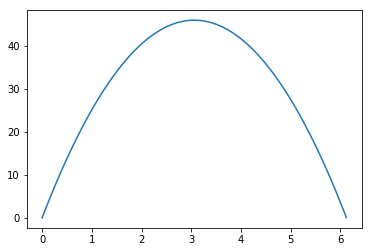

In [15]:
def position_b(time):
    return -4.9 * time ** 2 + 30 * time

t = np.linspace(0, 6.12)
z = position_b(t)

plt.plot(t, z)
plt.show()

**Fun fact (maybe)**

There's a reason I used the variable `z` in my plotting code. `z` is typically used to represent distance above the ground and the function you just plotted actually represents the height of a ball thrown upwards with an initial velocity of $30 m/s$. As you can see the ball reaches its maximum height about 3 seconds after being thrown.

### 2.1 - Generalize our plotting code
I don't want to have to keep copy and pasting plotting code so I'm just going to write a function...

In [16]:
def plot_continuous_function(function, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = function(t)
    plt.plot(t,x)

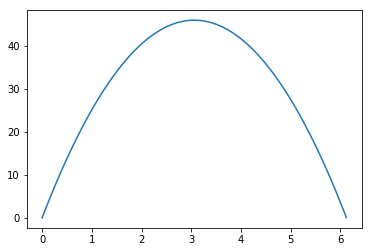

In [17]:
plot_continuous_function(position_b, 0, 6.12)
plt.show()

Take a look at `plot_continuous_function`. 

Notice anything weird about it?

This function actually *takes another function as input*. This is a perfectly valid thing to do in Python, but I know the first time I saw code like this I found it pretty hard to wrap my head around what was going on.

Just wait until a bit later in this notebook when you'll see a function that actually `return`s another function!

For now, let me show you other ways you can use `plot_continuous_function`.

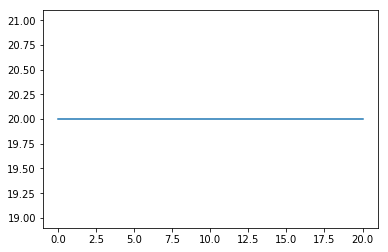

In [18]:
def constant_position_motion(time):
    position = 20
    return position + 0*time

def constant_velocity_motion(time):
    velocity = 10
    return velocity * time

def constant_acceleration_motion(time):
    acceleration = 9.8
    return acceleration / 2 * time ** 2
    
plot_continuous_function(constant_position_motion, 0, 20)
plt.show()

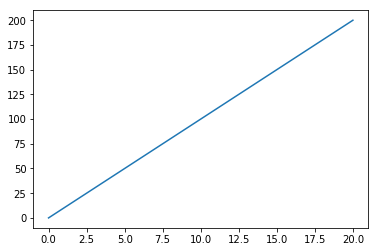

In [19]:
# position vs time 
# with constant VELOCITY motion

plot_continuous_function(constant_velocity_motion, 0, 20)
plt.show()

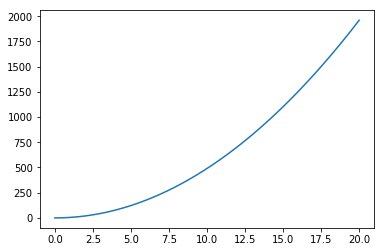

In [20]:
# position vs time
# with constant ACCELERATION motion

plot_continuous_function(constant_acceleration_motion, 0, 20)
plt.show()

----

## 3 - Find derivative "by hand" *at a specific point*

Let's go back to the ball-thrown-in-air example from before and see if we can find the **velocity** of the ball at various times. Remember, the graph looked like this:

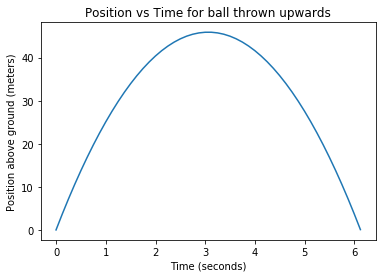

In [21]:
plt.title("Position vs Time for ball thrown upwards")
plt.ylabel("Position above ground (meters)")
plt.xlabel("Time (seconds)")
plot_continuous_function(position_b,0,6.12)
plt.show()

Now I would like to know the **velocity** of the ball at t=2 seconds. 

> GOAL - Find the velocity of the ball at t=2 seconds

And remember, **velocity is the derivative of position**, which means **velocity is the slope of the tangent line of position**

Well we have the position vs time graph... now we just need to find the slope of the tangent line to that graph AT t=2. 

One way to do that is to just zoom in on the graph until it starts to look straight. I can do that by changing the `t_min` and `t_max` that I pass into `plot_continuous_function`.

#### EXERCISE - "Linearize" a function by zooming in

The code below allows you to adjust a single parameter `DELTA_T` in order to control how zoomed in you are. 

Read through and run the code to get a sense for how it works. 

Then you should adjust `DELTA_T` until the graph looks like a straight line. Start by trying `DELTA_T = 3.0`, then `DELTA_T = 2.5`, then `2.0` etc... 

The "formal definition of the derivative" had a part that said:

$$\lim_{\Delta t \to 0}$$

This activity is an exploration of why "taking delta t to zero" makes sense.

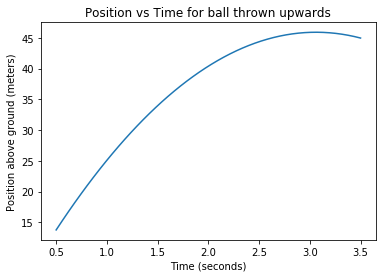

In [22]:
DELTA_T = 3.0

# you don't need to touch the code below

t_min = 2 - (DELTA_T / 2)
t_max = 2 + (DELTA_T / 2)

plt.title("Position vs Time for ball thrown upwards")
plt.ylabel("Position above ground (meters)")
plt.xlabel("Time (seconds)")
plot_continuous_function(position_b, t_min, t_max)
plt.show()

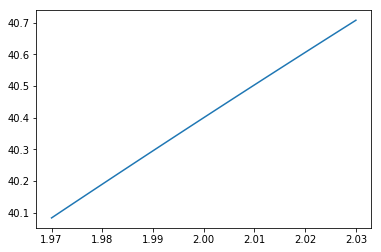

In [24]:
DELTA_T = 0.06
time = 2
t_min = time - (DELTA_T/2)
t_max = time + (DELTA_T/2)

plot_continuous_function(position_b, t_min, t_max)
plt.show()

With `DELTA_T = 0.06` (try it) the graph looks like this:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a31a625_linearized/linearized.png)

which looks PRETTY straight to me. Since we've zoomed in SO much the graph looks like a straight line.

The tangent line to this graph (at t=2) will have to have a slope that's REALLY close to the slope of *this* linear approximation.

So what's the slope of this line? 

$$\text{slope}=\frac{\text{vertical change in graph}}{\text{horizontal change in graph}}$$

or, another way to say that:

$$\text{slope}=\frac{\Delta z}{\Delta t}$$

**Vertical change**

The position has a value of about **40.08** (just less than 40.1) at the beginning and increases to about **40.71**  at the end. So the vertical change is 

$$\Delta z = 40.71 - 40.08 = 0.63 \text{ meters}$$ 

**Horizontal change**

The horizontal change is just $\Delta t$, which in this case is 0.06 seconds.

**Slope**

$$\text{slope} = \frac{0.63 \text{ meters}}{0.06 \text{ seconds}} = 10.5 \text{ meters per second}$$

----

## 4 - Finding derivatives algorithmically *at a certain point*

Why would we calculate the vertical change by looking at a graph? Let's just get the EXACT change numerically. 

The change in position for the zoomed in graph (which shows values from $t = 1.97$ to $t = 2.03$ is given mathematically as:

$$\Delta z = f(2.03) - f(1.97)$$

And we can calculate this in code as well!

In [25]:
DELTA_Z = position_b(2.03) - position_b(1.97)
DELTA_T = 0.06
SLOPE = DELTA_Z / DELTA_T

print("the graph goes from", position_b(1.97), "at t=1.97")
print("to", position_b(2.03), "at t=2.03")
print("which is a delta z of", DELTA_Z)
print()
print("This gives a slope of", SLOPE)

the graph goes from 40.08359 at t=1.97
to 40.707589999999996 at t=2.03
which is a delta z of 0.6239999999999952

This gives a slope of 10.39999999999992


Using the **exact** values of the function gives us a more accurate value for the slope (and therefore the velocity of the ball). But now it looks like we've answered our question:

> The velocity of the ball at $t=2$ is **10.4 meters per second**

#### EXERCISE - Find the speed of the ball at t = 3.45

Use a sequence of steps similar to what we just did for $t=2$ to find the velocity of the ball at $t=3.45$ 

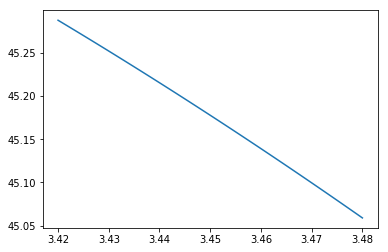

In [26]:
# Your code here!

DELTA_T = 0.06
time = 3.45
time_min = time - (DELTA_T/2)
time_max = time + (DELTA_T/2)
t = np.linspace(time_min, time_max)
d = position_b(t) 

plt.plot(t,d)
plt.show()



In [31]:
z_at_t_min = position_b(time_min)
z_at_t_max = position_b(time_max)
delta_z = z_at_t_max - z_at_t_min

slope = (delta_z / (time_max-time_min))
print(slope)



-3.8099999999999086


In [29]:
#

#

#

# Spoiler alert! Solution below!

#

#

#

#

In [30]:
# SOLUTION - FIRST ATTEMPT

# 1. set some relevant parameters
TIME    = 3.45
DELTA_T = 0.02

# 2. The "window" should extend 0.01 to the left and 
#    0.01 to the right of the target TIME
t_min = TIME - (DELTA_T / 2)
t_max = TIME + (DELTA_T / 2)

# 3. calculate the value of the function at the left and
#    right edges of our "window"
z_at_t_min = position_b(t_min)
z_at_t_max = position_b(t_max)

# 4. calculate vertical change
delta_z = z_at_t_max - z_at_t_min

# 5. calculate slope
slope = delta_z / DELTA_T

print("speed is",slope, "m/s at t =", TIME)

speed is -3.810000000000713 m/s at t = 3.45


You can see my solution above. This code *approximates* the derivative of our position_b function at the time $t=3.45$.

With a bit of modification we could make this into a function that approximates the derivative of **any** function at **any** time!

In [32]:
# SOLUTION - second (better) version
def approximate_derivative(f, t):
    # 1. Set delta_t. Note that I've made it REALLY small.
    delta_t = 0.00001
    
    # 2. calculate the vertical change of the function
    #    NOTE that the "window" is not centered on our 
    #    target time anymore. This shouldn't be a problem
    #    if delta_t is small enough.
    vertical_change = f(t + delta_t) - f(t)
    
    # 3. return the slope
    return vertical_change / delta_t

deriv_at_3_point_45 = approximate_derivative(position_b, 3.45)
print("The derivative at t = 3.45 is", deriv_at_3_point_45)

The derivative at t = 3.45 is -3.8100489987868964


In [35]:
# SOLUTION - second (better) version
def approximate_derivative(f, t):
    # 1. Set delta_t. Note that I've made it REALLY small.
    delta_t = 0.0000001
    
    # 2. calculate the vertical change of the function
    #    NOTE that the "window" is not centered on our 
    #    target time anymore. This shouldn't be a problem
    #    if delta_t is small enough.
    vertical_change = f(t + delta_t) - f(t)
    
    # 3. return the slope
    return vertical_change / delta_t

deriv_at_3_point_45 = approximate_derivative(position_b, 3.45)
print("The derivative at t = 3.45 is", deriv_at_3_point_45)

The derivative at t = 3.45 is -3.810000421822224


Let's connect the code in the function above to the mathematical  definition of the derivative...

> The **derivative of $f(t)$ with respect to t** is the function $\dot{f}(t)$ and is defined as

> $$\dot{f}(t) = \lim_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$$

1. As you can see, I made `delta_t` very small (0.00001) so as to approximate "the limit as $\Delta t$ goes to 0". Why not just set `delta_t = 0.0`? Go ahead! Try it in function above. See what happens when you try to run it :)

2. The vertical change of the function at time `t` is calculated in the exact same way that the mathematical definition prescribes.

3. The slope is calculated identically as well.

----

## 5 - OPTIONAL: Finding the "full" derivative

The `approximate_derivative` function is good because it works for ANY function at ANY point. But I want to know the derivative of ANY function at **EVERY** point. 

> GOAL - I want a function that takes a continuous function as input and produces ANOTHER continuous function as output. The output function should be the derivative of the input function.

In [39]:
# These four lines of code do exactly what we wanted!
# There is a good chance that this will be the 
# hardest-to-understand code you see in this whole 
# Nanodegree, so don't worry if you're confused. 

def get_derivative(f):
    def f_dot(t):
        return approximate_derivative(f,t)
    return f_dot

In [41]:
def get_derivative2(f, t):
    
    return approximate_derivative(f, t)
    

After reading (and running) the code above, try running the code cells below to see why this function is useful...

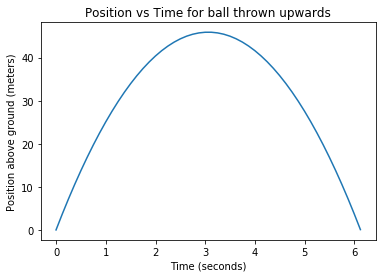

In [44]:
# plot 1 - a reminder of what our position function looks like.
#         Remember, this is a plot of vertical POSITION vs TIME
#         for a ball that was thrown upwards.

plt.title("Position vs Time for ball thrown upwards")
plt.ylabel("Position above ground (meters)")
plt.xlabel("Time (seconds)")
plot_continuous_function(position_b, 0, 6.12)
plt.show()

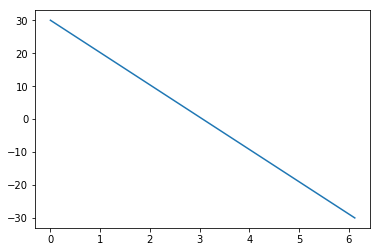

In [51]:
# plot 2 - a plot of VELOCITY vs TIME for the same ball! Note 
#    how the ball begins with a large positive velocity (since
#    it's moving upwards) and ends with a large negative 
#    velocity (downwards motion right before it hits the ground)

velocity_b = get_derivative(position_b)
plot_continuous_function(velocity_b, 0, 6.12)
plt.show()

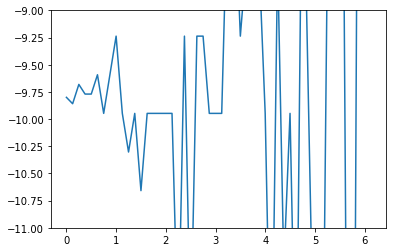

In [53]:
# plot 3 - a plot of ACCELERATION vs TIME for the same ball.
#    Note that the acceleration is a constant value 
#    of -9.8 m/s/s. That's because gravity always causes 
#    objects to accelerate DOWNWARDS at that rate.

acceleration_b = get_derivative(velocity_b)
plt.ylim([-11, -9])
plot_continuous_function(acceleration_b, 0, 6.12)
plt.show()

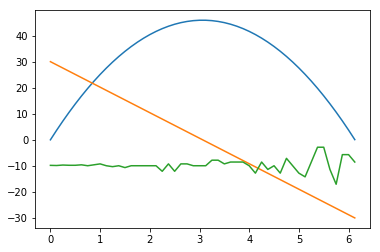

In [61]:
# plot 4 - All 3 plots at once!
plot_continuous_function(position_b, 0, 6.12)
plot_continuous_function(velocity_b, 0, 6.12)
plot_continuous_function(acceleration_b, 0, 6.12)
plt.show()

Now that you've seen what `get_derivative` can do for us, let's try to understand how it works...

```python
def get_derivative(f):
    def f_dot(t):
        return approximate_derivative(f,t)
    return f_dot
```

Let's go line by line.

1. `def get_derivative(f):` The important thing to note here is that this function only takes ONE input and that input is a function `f`.

2. `def f_dot(t):` Here we define a new function INSIDE `get_derivative`. And note that THIS function only takes a single input `t`.

3. `return approximate_derivative(f,t)` Here we define the behavior of `f_dot` **when called with some time `t`**. And what we want it to do is to approximate the derivative of the function `f` at time `t`.

4. `return f_dot` Here we return the function that we just defined! Weird, but reasonable if you think about it. Now, if you think about the `get_derivative` functions overall role, it's this: take a function as input and produce another function (which is the derivative) as output.
